In [1]:
import pandas as pd
import numpy as np

In [2]:
# save filepath to variable for easier access
# melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
df = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
df.shape

(13580, 21)

In [4]:
df=df.dropna(axis=0)

In [5]:
# data size after the null drops:
df.shape

(6196, 21)

In [6]:
#df['Type'=="h"].shape

In [7]:
import seaborn as sns

<Axes: xlabel='Type', ylabel='Count'>

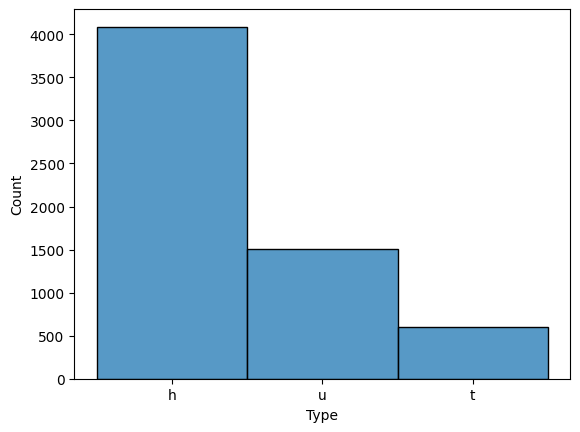

In [8]:
sns.histplot(data=df, x='Type')

[Text(0.5, 1.0, 'Price by No of Rooms')]

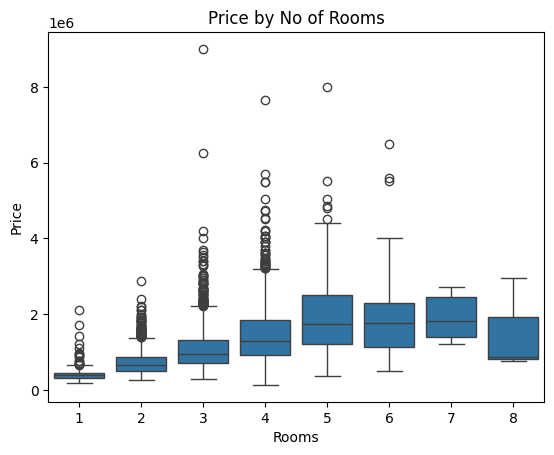

In [9]:
sns.boxplot(y="Price", x = "Rooms", data=df).set(title = "Price by No of Rooms")

In [10]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

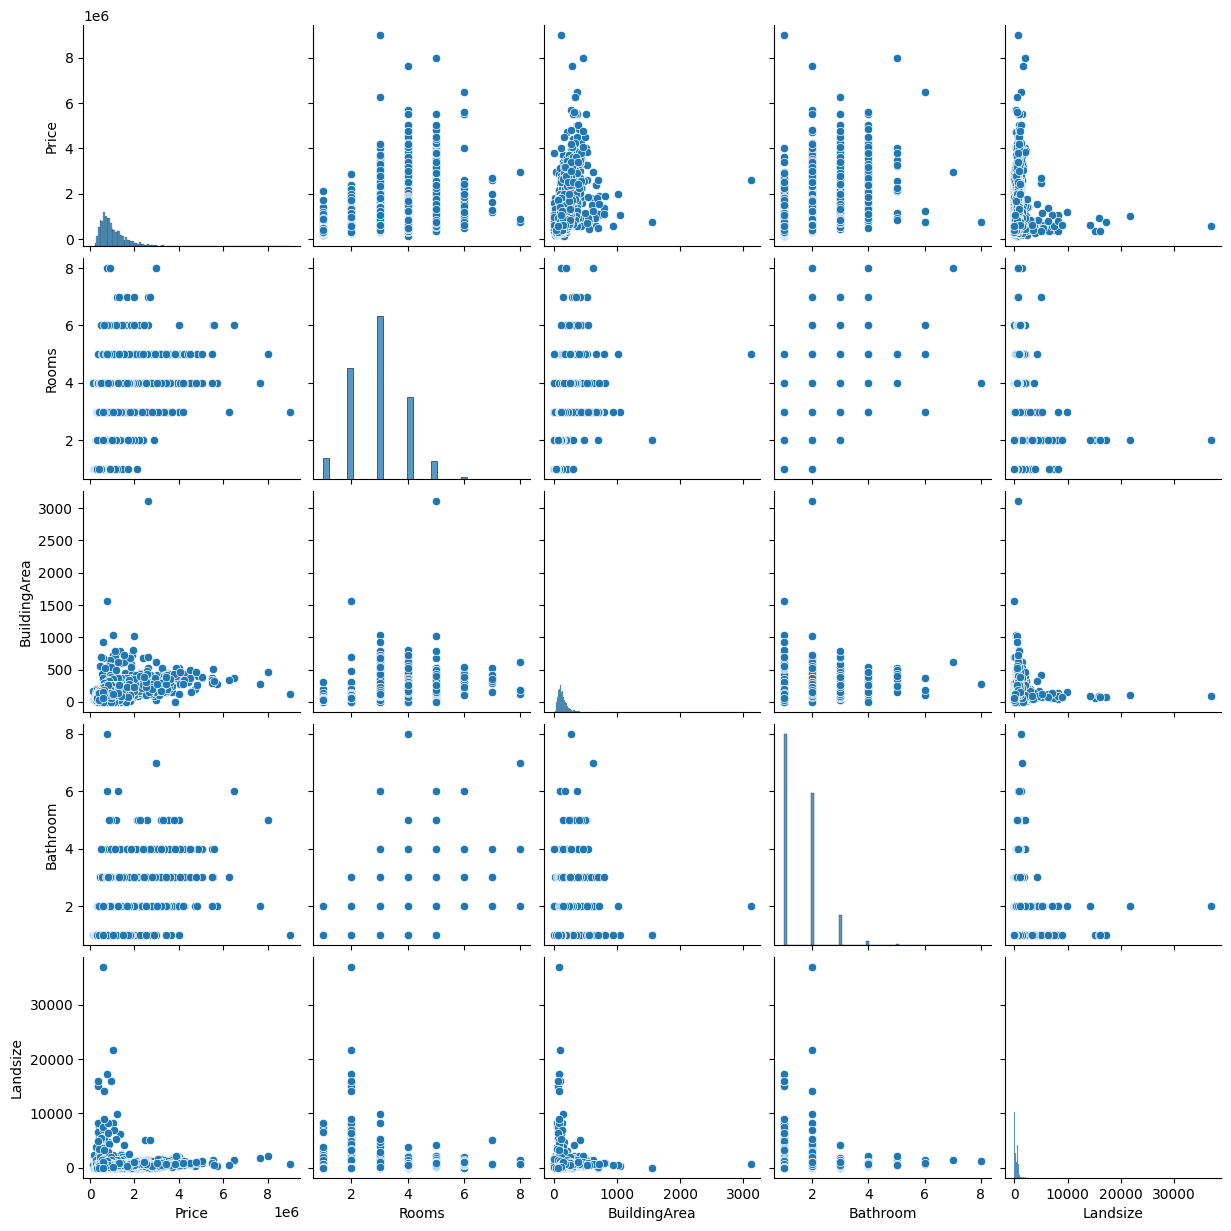

In [11]:
sns.pairplot(df[["Price","Rooms","BuildingArea","Bathroom","Landsize"]])

In [12]:
# building a prediction model
y=df.Price
X=df[['Rooms', 'Bathroom', 'Landsize','BuildingArea']]

In [13]:
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea
count,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645
std,0.971079,0.711362,897.449881,90.834824
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,152.000000,91.000000
50%,3.000000,1.000000,373.000000,124.000000
75%,4.000000,2.000000,628.000000,170.000000
max,8.000000,8.000000,37000.000000,3112.000000


In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model=DecisionTreeRegressor(random_state=1)

In [16]:
model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [17]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea
1      2       1.0     156.0          79.0
2      3       2.0     134.0         150.0
4      4       1.0     120.0         142.0
6      3       2.0     245.0         210.0
7      2       1.0     256.0         107.0
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [18]:
print('Historical real prices:')
print(y.head())
print('Predicted prices:')
model.predict(X.head())

Historical real prices:
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64
Predicted prices:


array([1035000., 1465000., 1600000., 1876000., 1636000.])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [22]:
print('A new build using Train and Test split')
print('Historical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

A new build using Train and Test split
Historical real prices:
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64
Predicted prices:


array([ 680000.,  880000., 1042000.,  895000., 2752000.])

In [23]:
# adding BuildingArea column to the list of independent variables and rebuilding the model
y=df.Price
X=df[['Rooms', 'Bathroom', 'Landsize','BuildingArea']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)
model.fit(X_train,y_train)

print('Historical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

Historical real prices:
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64
Predicted prices:


array([ 680000.,  880000., 1042000.,  895000., 2752000.])

In [24]:
print("R² Score:", r2_score(y_test, model.predict(X_test))) 

R² Score: 0.026931449536372054


In [25]:
# removing Landsize and rebuilding the model with other features
y=df.Price
X=df[['Rooms', 'Bathroom', 'BuildingArea','Car','YearBuilt']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)
model=DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test))) 

print('Historical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

R² Score: 0.3536200664164445
Historical real prices:
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64
Predicted prices:


array([ 490000., 1662000.,  937000.,  700000., 8000000.])

In [26]:
# let's use Linear Regeression instead of 
y=df.Price
X=df[['Rooms', 'Bathroom', 'BuildingArea']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test))) 
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # y-intercept
print('\nHistorical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

R² Score: 0.42213596009189613
Coefficients: [168475.33318051 202086.24294716   1877.57679862]
Intercept: -7092.277011162601

Historical real prices:
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64
Predicted prices:


array([1395616.85515758, 1444619.32453011, 1131570.57785604,
       1152223.92264084, 2901592.7112503 ])

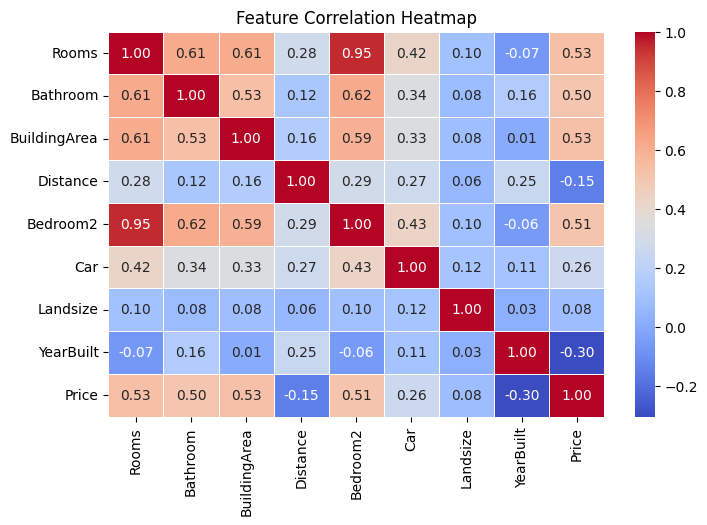

In [27]:
# let's check all features and how they correlate
import matplotlib.pyplot as plt
correlation_matrix = df[['Rooms', 'Bathroom', 'BuildingArea','Distance', 'Bedroom2', 'Car',
       'Landsize', 'YearBuilt','Price']].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
# Select upper triangle of correlation matrix (to avoid duplicates)
data=df[['Rooms', 'Bathroom', 'BuildingArea','Distance', 'Bedroom2', 'Car',
       'Landsize', 'YearBuilt','Price']]
correlation_matrix = data.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with high correlation (e.g., > 0.85)
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop highly correlated features

data_reduced = data.drop(columns=to_drop)

print("Selected Features:", data_reduced.columns)


Selected Features: Index(['Rooms', 'Bathroom', 'BuildingArea', 'Distance', 'Car', 'Landsize',
       'YearBuilt', 'Price'],
      dtype='object')


In [29]:
import statsmodels.api as sm

# Add a constant for the intercept
#X = sm.add_constant(data.drop(columns=['price']))
#y = data['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              9578.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                        0.00
Time:                        12:08:52   Log-Likelihood:                         -90486.
No. Observations:                6196   AIC:                                  1.810e+05
Df Residuals:                    6193   BIC:                                  1.810e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [30]:
# let's use OLS
y=df.Price
X=df[['Rooms', 'Bathroom', 'BuildingArea']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)
model=sm.OLS(y_train,X_train)
model=model.fit()
print("R² Score:", r2_score(y_test, model.predict(X_test))) 
print(model.summary())
print('\nHistorical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

R² Score: 0.4219362962513251
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              7492.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                        0.00
Time:                        12:08:52   Log-Likelihood:                         -72434.
No. Observations:                4956   AIC:                                  1.449e+05
Df Residuals:                    4953   BIC:                                  1.449e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
----------

6048    1.395169e+06
9186    1.443075e+06
3991    1.131697e+06
5829    1.152401e+06
3616    2.893857e+06
dtype: float64

In [31]:
# trying a subset for houses only
df_house=df[df['Type']=='h']
print(df_house.shape)
y=df_house.Price
X=df_house[['Rooms', 'Bathroom', 'BuildingArea','Car','YearBuilt']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=1)
model=DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)
print('Depth: ',model.get_depth()) 
print('Number of leaves: ',model.tree_.n_leaves)
print("R² Score:", r2_score(y_test, model.predict(X_test))) 

print('Historical real prices:')
print(y_test.head())
print('Predicted prices:')
model.predict(X_test.head())

(4088, 21)
Depth:  29
Number of leaves:  3021
R² Score: -0.18745285461108052
Historical real prices:
4449     1300000.0
10736    1340000.0
4861     1582000.0
6486     1400000.0
575      3020000.0
Name: Price, dtype: float64
Predicted prices:


array([1490000.,  131000., 1365000., 1740000., 2570000.])

[Text(0.5, 1.0, 'Actual v Predicted Prices'),
 Text(0.5, 0, 'Real Price'),
 Text(0, 0.5, 'Predicted Price')]

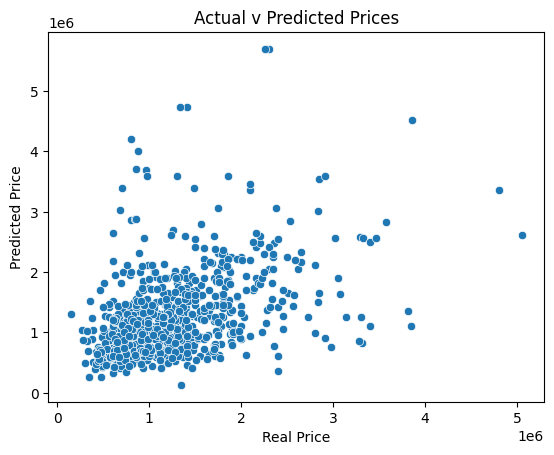

In [32]:
sns.scatterplot(x = y_test, y =model.predict(X_test)).set(title='Actual v Predicted Prices', xlabel='Real Price', ylabel='Predicted Price')

An R² score of -0.19 is quite poor, and in the context of a DecisionTreeRegressor, a negative R² indicates that the model is performing worse than simply predicting the mean of the target variable (which would have an R² score of 0). The negative value suggests that the model is not capturing the underlying patterns effectively and is likely overfitting the data.

Possible Reasons for Poor Performance:

Overfitting:
Decision trees, especially when not properly regularized, can easily overfit. They tend to capture noise in the data, which leads to poor performance on unseen data (test set).
The tree might be too complex or deep.

Insufficient Data for House Type:
If the subset you're using (only houses) is significantly smaller than the original dataset, the model might struggle due to lack of sufficient data to learn from.
The feature distribution might change, leading to poorer generalization.

Irrelevant Features:
The features you're using for the prediction might not be effective for the "houses" subset. Some features may not correlate well with house prices for that specific type of property.

Data Imbalance:
There might be a skewed distribution of target values in the subset of houses, which can affect the model's ability to make accurate predictions.

# Model Optimisation

In [33]:
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train,y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [34]:
#nodes_range=[5, 15,25,35,50, 75, 100,150,200, 250, 500]
nodes_range=np.arange(5,151,5)
mae_res=[]
for max_leaf_nodes in nodes_range:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    mae_res.append(my_mae)
#    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


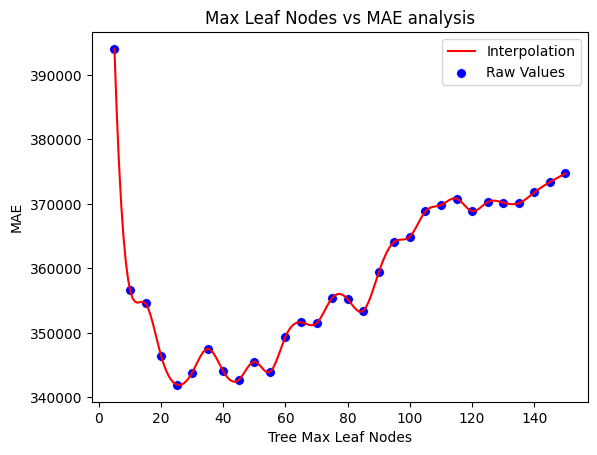

In [35]:
from scipy.interpolate import make_interp_spline
xval=np.array(nodes_range)
yval=np.array(mae_res)

x_smooth = np.linspace(xval.min(), xval.max(), 200)  # Больше точек для плавности
spl = make_interp_spline(xval, yval, k=3)  # k=3 делает кубический сплайн
y_smooth = spl(x_smooth)

sns.lineplot(x=x_smooth, y=y_smooth, label="Interpolation", color='red')
sns.scatterplot(x=xval, y=yval, color='blue', s=50, label="Raw Values")  # Показываем исходные точки

plt.xlabel('Tree Max Leaf Nodes')
plt.ylabel('MAE')
plt.title('Max Leaf Nodes vs MAE analysis')
plt.legend()
plt.show()

In [36]:
min_index = np.argmin(mae_res)

print(f"Minimal MAE: {mae_res[min_index]:.2f} achieved with Max Leaf Nodes={nodes_range[min_index]}")


Minimal MAE: 341993.18 achieved with Max Leaf Nodes=25


_Let's try to fit the model with Max_leaf_nodes=25_

Depth:  6
Number of leaves:  25
R² Score: 0.4419089978453977


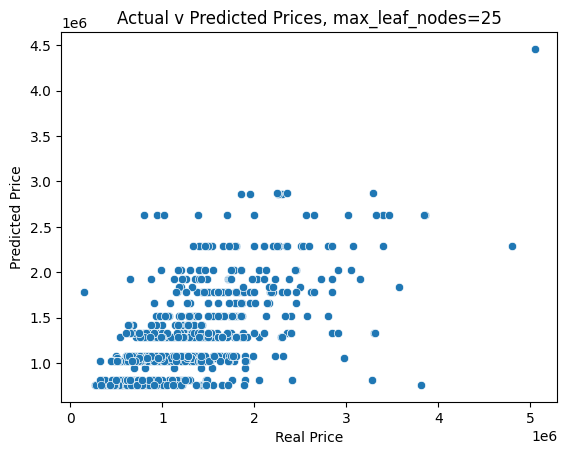

In [37]:
max_nodes=25
model=DecisionTreeRegressor(random_state=1,max_leaf_nodes=max_nodes)
model.fit(X_train,y_train)
print('Depth: ',model.get_depth()) 
print('Number of leaves: ',model.tree_.n_leaves)
print("R² Score:", r2_score(y_test, model.predict(X_test))) 

sns.scatterplot(x = y_test, y =model.predict(X_test)).set(title=f'Actual v Predicted Prices, max_leaf_nodes={max_nodes}', xlabel='Real Price', ylabel='Predicted Price')
plt.show()

### R-square is better, but the depth is very shallow and it seems that the model is underfitted.
Let's try the next bigger MAE with max_leaf_nodes=45

Depth:  7
Number of leaves:  30
R² Score: 0.41461760952472504


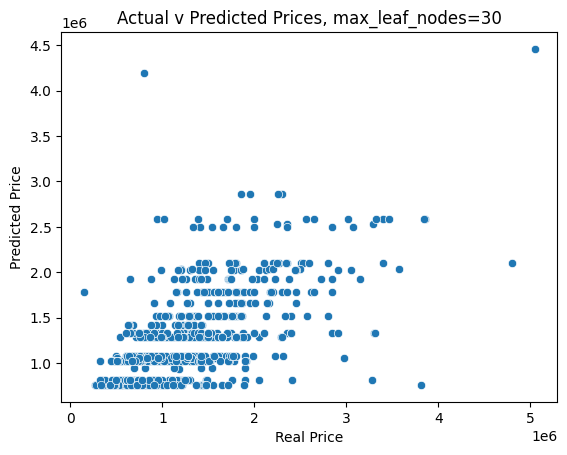

In [38]:
max_nodes=30
model=DecisionTreeRegressor(random_state=1,max_leaf_nodes=max_nodes)
model.fit(X_train,y_train)
print('Depth: ',model.get_depth()) 
print('Number of leaves: ',model.tree_.n_leaves)
print("R² Score:", r2_score(y_test, model.predict(X_test))) 

sns.scatterplot(x = y_test, y =model.predict(X_test)).set(title=f'Actual v Predicted Prices, max_leaf_nodes={max_nodes}', xlabel='Real Price', ylabel='Predicted Price')
plt.show()